In [92]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import shapefile
import os
import seaborn as sns
%matplotlib inline

In [18]:
# read the yield files
shp = open('Yield/CropProductionServices_FamilyFarmsGroup_MBSFamilyFarmsMBSFamilyFarms_4HEnterprises_HadleyNorth_yield_Soybeans-2015_soybeans_261.shp')
dbf = open('Yield/CropProductionServices_FamilyFarmsGroup_MBSFamilyFarmsMBSFamilyFarms_4HEnterprises_HadleyNorth_yield_Soybeans-2015_soybeans_261.dbf')

sf = shapefile.Reader(shp=shp,dbf=dbf)

In [19]:
# how many records are in here
print len(sf.shapes())

293


In [20]:
# what are their locations
print sf.shape(5).points

[(-92.5067759692861, 43.01565400683413), (-92.50675724946457, 43.015653720125606), (-92.5067578662912, 43.01563444344036), (-92.50677658838825, 43.015634634587144), (-92.5067759692861, 43.01565400683413), (-92.50675724946457, 43.0156537201256), (-92.50673852964304, 43.01565343341707), (-92.50673914419413, 43.01563425229357), (-92.50675786629118, 43.015634443440355), (-92.50675724946457, 43.0156537201256), (-92.50673852964304, 43.015653433417064), (-92.50671980982152, 43.01565314670854), (-92.50672042209706, 43.01563406114679), (-92.50673914419411, 43.01563425229357), (-92.50673852964304, 43.015653433417064), (-92.50671980982153, 43.01565314670853), (-92.50670109, 43.01565286), (-92.5067017, 43.01563387), (-92.50672042209705, 43.015634061146784), (-92.50671980982153, 43.01565314670853), (-92.50670109, 43.01565286), (-92.50668237017848, 43.015652573291476), (-92.50668297790294, 43.01563367885322), (-92.5067017, 43.01563387), (-92.50670109, 43.01565286), (-92.5066823701785, 43.01565257329

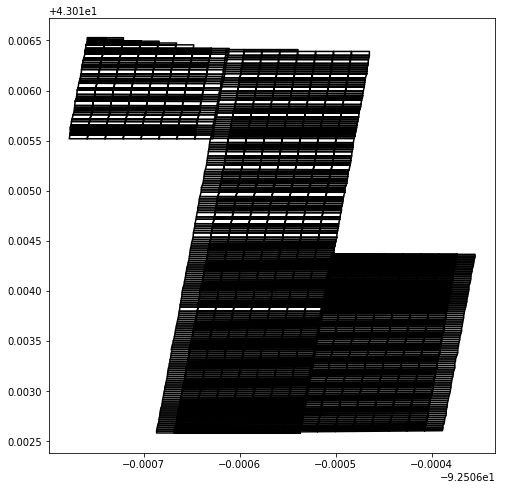

In [22]:
# shape looks like this I guess
plt.figure(figsize=(8,8))
ax = plt.axes()
#ax.set_aspect('equal')
for shp in sf.iterShapes():
    x = [ b[0] for b in shp.points ]
    y = [ b[1] for b in shp.points ]
    plt.plot(x,y,'k')

In [70]:
# here is a file name
fbasename = os.path.splitext( os.path.basename('Yield/CropProductionServices_FamilyFarmsGroup_MBSFamilyFarmsMBSFamilyFarms_4HEnterprises_HadleyNorth_yield_Soybeans-2015_soybeans_261.shp') )[0]

In [47]:
# get the column names
cols = [ x[0] for x in sf.fields[1:] ]

print cols

['TIME', 'LON', 'LAT', 'ELEV', 'AREA', 'SPEED', 'DIST', 'WIDTH', 'DURATION', 'PASS', 'FLOW', 'MAPPABLE', 'MOIST0', 'YIELD0', 'MOIST', 'YIELD']


In [48]:
# what the data actually look like
print sf.shapeRecords()[0].record
print sf.shapeRecords()[0].shape.points
print sf.shapeRecords()[0].shape.parts

[1444948071, -92.50669861, 43.01555634, 301.83, 0.01286514, 2.11, 2.11, 12.192, 1.0, 1, 7.9145999, 1, 9.0, 615.2, 9.0, 615.2]
[(-92.50677705456839, 43.01555729672819), (-92.5067583309263, 43.01555722504614), (-92.50675911029234, 43.01551893672716), (-92.5067778337231, 43.01551903230289), (-92.50677705456839, 43.01555729672819), (-92.50675833092629, 43.015557225046145), (-92.5067396072842, 43.01555715336409), (-92.50674038686155, 43.01551884115144), (-92.50675911029232, 43.01551893672717), (-92.50675833092629, 43.015557225046145), (-92.50673960728419, 43.0155571533641), (-92.5067208836421, 43.01555708168205), (-92.50672166343078, 43.01551874557572), (-92.50674038686155, 43.01551884115145), (-92.50673960728419, 43.0155571533641), (-92.50672088364209, 43.015557081682054), (-92.50670216, 43.01555701), (-92.50670294, 43.01551865), (-92.50672166343077, 43.015518745575726), (-92.50672088364209, 43.015557081682054), (-92.50670216, 43.01555701), (-92.50668343635792, 43.01555693831795), (-92.506

In [50]:
# put it in a df
mylist = []
for item in sf.iterShapeRecords():
    mylist.append( item.record )
    
df = pd.DataFrame(mylist,columns=cols)
print len(df)
df.head()

293


,TIME,LON,LAT,ELEV,AREA,SPEED,DIST,WIDTH,DURATION,PASS,FLOW,MAPPABLE,MOIST0,YIELD0,MOIST,YIELD
0,1444948071,-92.506699,43.015556,301.83,0.012865,2.11,2.11,12.192,1.0,1,7.9146,1,9.0,615.20,9.0,615.20
1,1444948072,-92.506699,43.015575,301.78,0.006428,2.13,2.13,12.192,1.0,1,9.1933,1,9.1,1430.20,9.1,1430.20
2,1444948074,-92.506699,43.015594,301.71,0.006463,2.13,2.14,12.192,2.0,1,10.0972,1,9.1,3124.56,9.1,3124.56
3,1444948075,-92.506699,43.015614,301.63,0.006434,2.13,2.13,12.192,1.0,1,9.3917,1,9.1,1459.68,9.1,1459.68
4,1444948076,-92.506699,43.015633,301.55,0.006452,2.13,2.13,12.192,1.0,1,9.6122,1,9.1,1489.70,9.1,1489.70


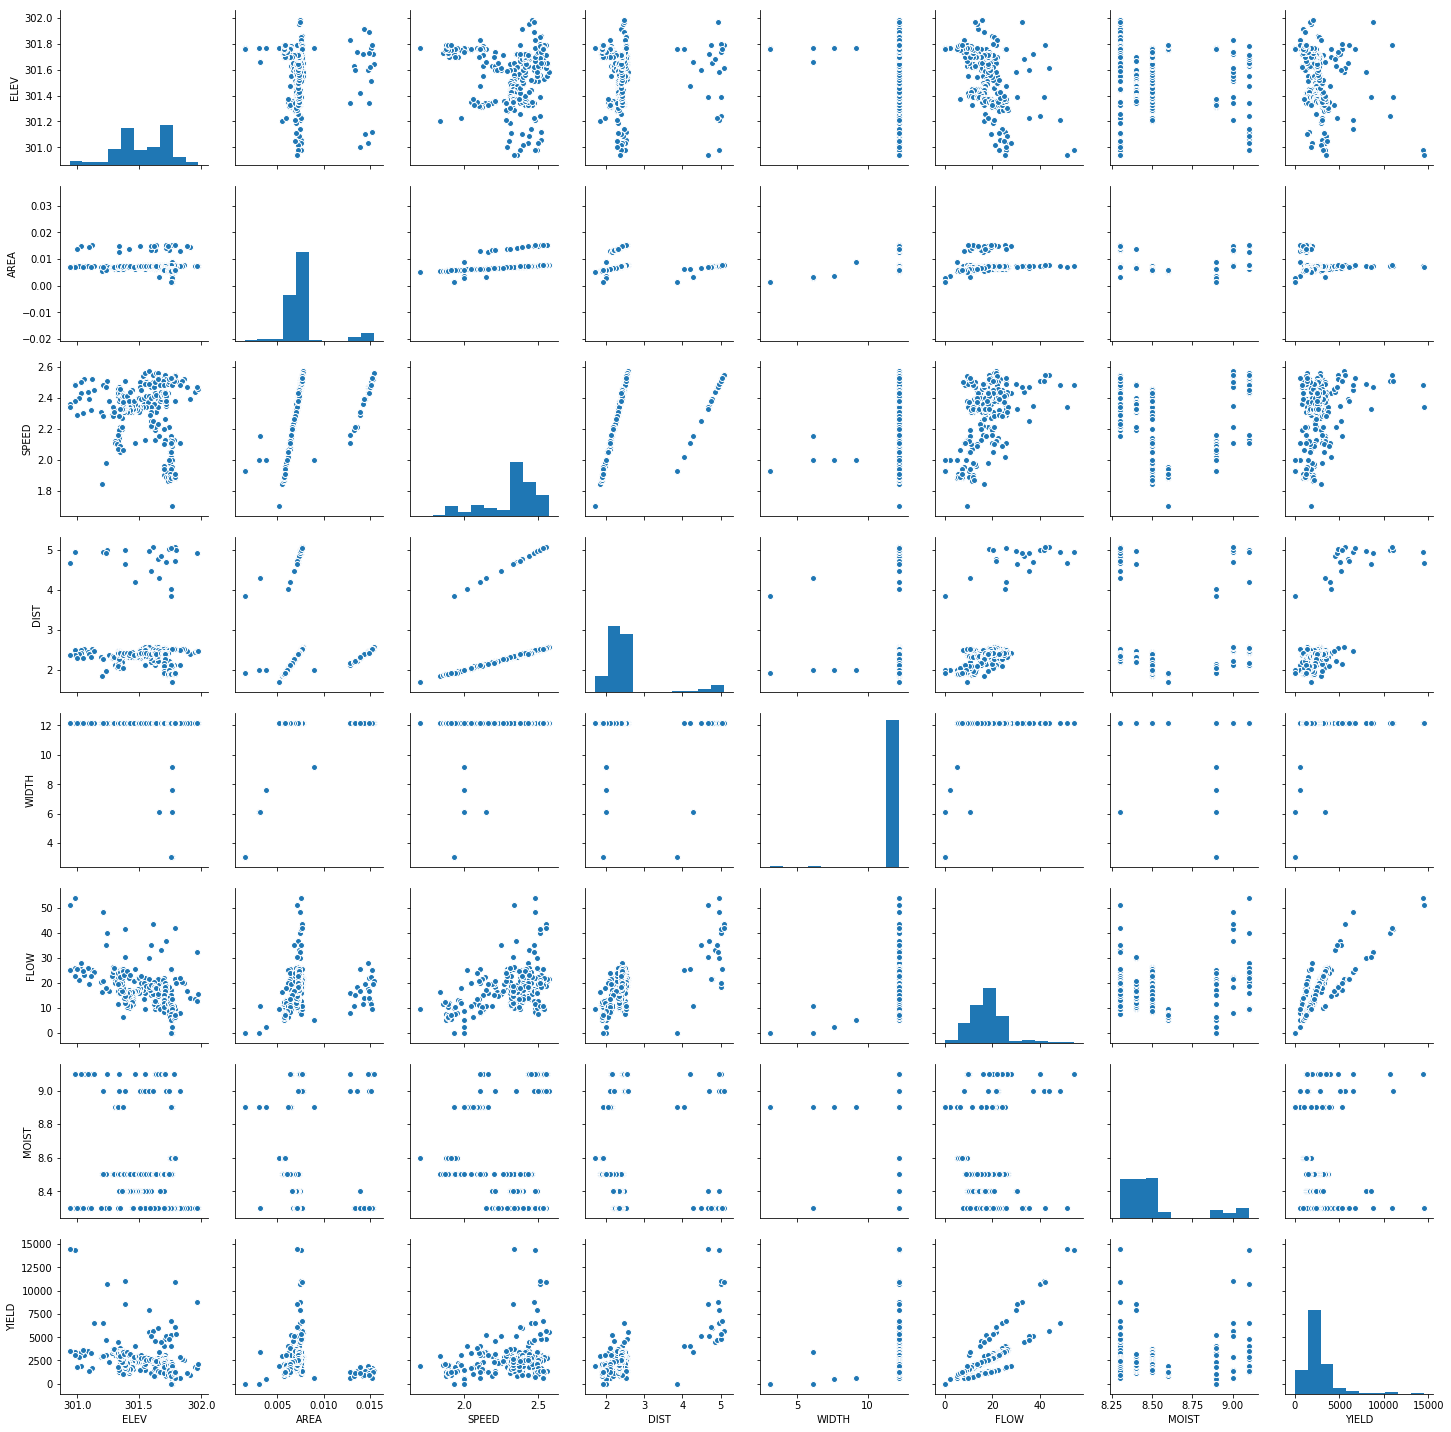

In [119]:
sns.pairplot(df[['ELEV','AREA','SPEED','DIST','WIDTH','FLOW','MOIST','YIELD']])

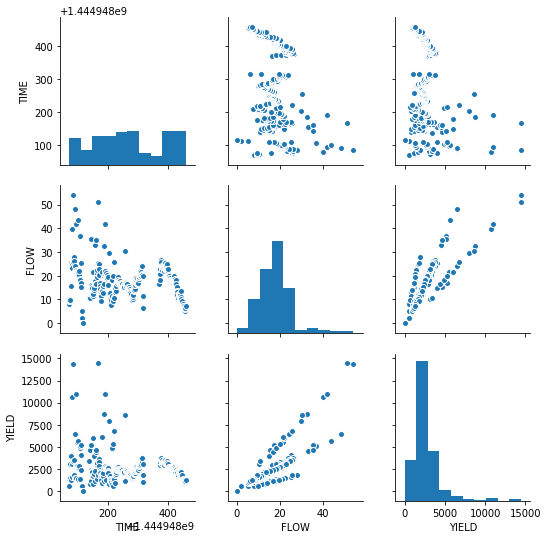

In [83]:
sns.pairplot(df[['TIME','FLOW','YIELD']])#,plot_kws={'s':5})

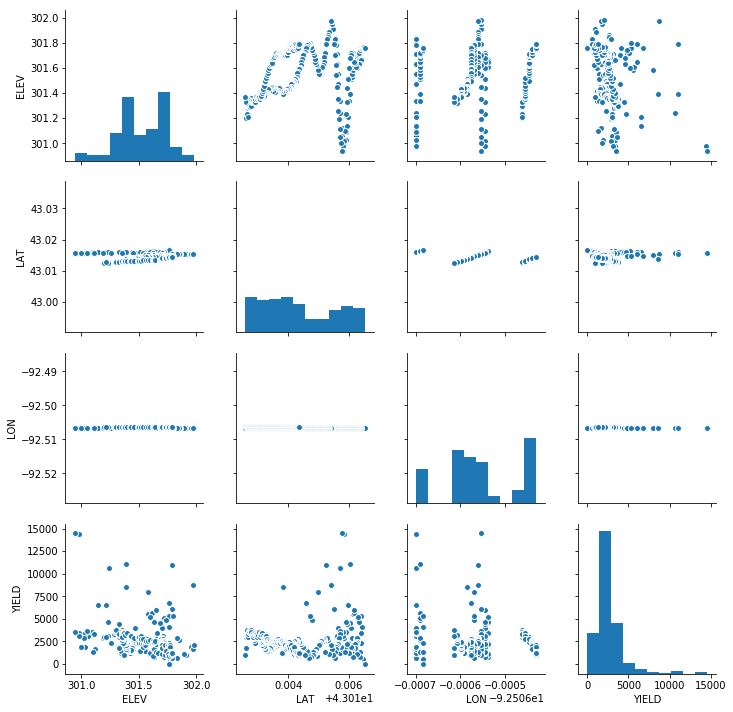

In [123]:
sns.pairplot(df[['ELEV','LAT','LON','YIELD']])#,plot_kws={'s':5})

In [84]:
df = df.sort_values(by=['TIME'])
df.head()

,TIME,LON,LAT,ELEV,AREA,SPEED,DIST,WIDTH,DURATION,PASS,FLOW,MAPPABLE,MOIST0,YIELD0,MOIST,YIELD
0,1444948071,-92.506699,43.015556,301.83,0.012865,2.11,2.11,12.192,1.0,1,7.9146,1,9.0,615.20,9.0,615.20
1,1444948072,-92.506699,43.015575,301.78,0.006428,2.13,2.13,12.192,1.0,1,9.1933,1,9.1,1430.20,9.1,1430.20
2,1444948074,-92.506699,43.015594,301.71,0.006463,2.13,2.14,12.192,2.0,1,10.0972,1,9.1,3124.56,9.1,3124.56
3,1444948075,-92.506699,43.015614,301.63,0.006434,2.13,2.13,12.192,1.0,1,9.3917,1,9.1,1459.68,9.1,1459.68
4,1444948076,-92.506699,43.015633,301.55,0.006452,2.13,2.13,12.192,1.0,1,9.6122,1,9.1,1489.70,9.1,1489.70


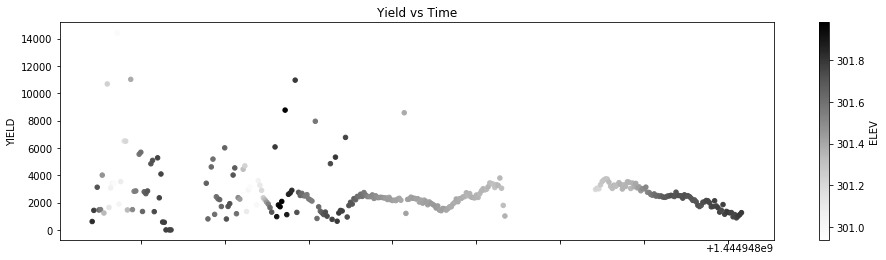

In [144]:
df.plot(x='TIME',y='YIELD',kind='scatter',c='ELEV',figsize=(16,4))
plt.title('Yield vs Time')

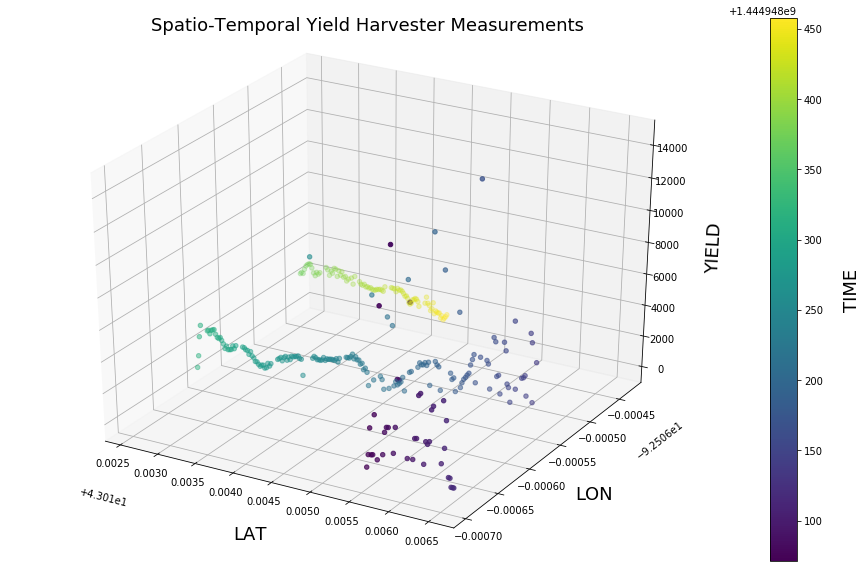

In [143]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['LAT'],df['LON'],df['YIELD'],c=df['TIME'])
cb = plt.colorbar(sc)
cb.set_label('TIME',size=18,labelpad=20)
ax.set_xlabel('LAT',size=18,labelpad=20)
ax.set_ylabel('LON',size=18,labelpad=20)
ax.set_zlabel('YIELD',size=18,labelpad=20)
plt.title('Spatio-Temporal Yield Harvester Measurements',size=18,y=1.05)

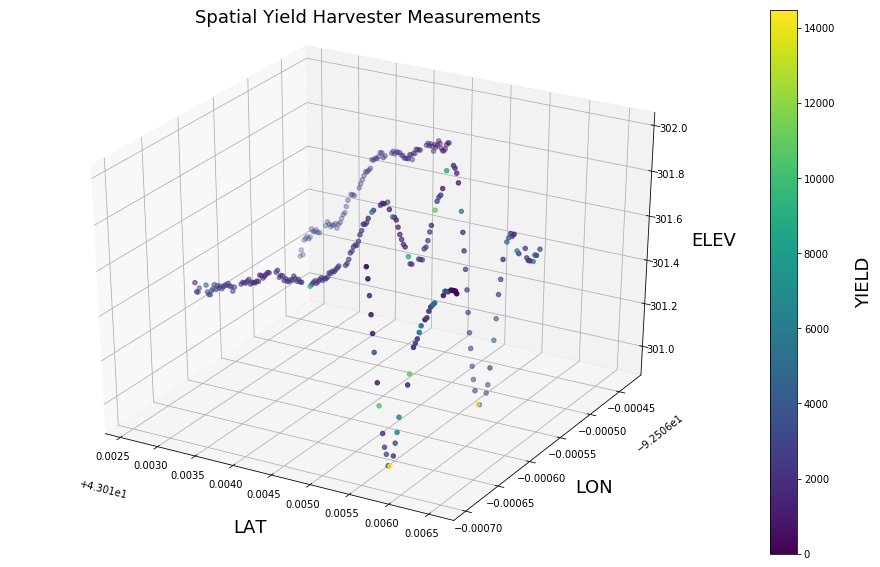

In [142]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['LAT'],df['LON'],df['ELEV'],c=df['YIELD'])
cb = plt.colorbar(sc)
cb.set_label('YIELD',size=18,labelpad=20)
ax.set_xlabel('LAT',size=18,labelpad=20)
ax.set_ylabel('LON',size=18,labelpad=20)
ax.set_zlabel('ELEV',size=18,labelpad=20)
plt.title('Spatial Yield Harvester Measurements',size=18,y=1.05)

In [139]:
myser = (df['TIME']-df['TIME'].min()) / ( df['TIME'].max() - df['TIME'].min() )
print myser.max()
print myser.min()


1.0
0.0
